In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Data.xlsx')

In [4]:
df.describe()

,Key,x,y
count,1.616810e+05,161681.000000,161681.000000
mean,2.129456e+16,9.195092,24.270372
std,1.484469e+16,18.646770,352.344562
min,8.235329e+13,0.010000,0.000000
25%,3.325879e+15,1.890000,0.000000
50%,3.236335e+16,4.300000,1.000000
75%,3.336638e+16,9.600000,4.000000
max,3.726236e+16,1034.390000,46531.000000


In [5]:
# Get the unique keys and then build data frames correspondng to the keys. 

# Make a copy of the dataframe
dfc = df.copy()

# Get the keys 
keys = dfc['Key'].unique()

In [7]:
# Number of unique keys, hence the number of different data sets. 

print("The number of unique keys is: ", len(keys))

The number of unique keys is:  173


In [8]:
# Build data frames correspondign to these keys

def builddf(data):
    key_data = {} # Build a dictionary
    for i,k in enumerate(keys):
        key_data[k] = data[data['Key']==k] # Datafrmae corresponding to the key. 
    return key_data

In [9]:
# Calling the function.
dfs = builddf(dfc)


Below we work with a data set correspinding to a specific key and  
build a model to find the point of diminishing returns for it.  

The model will then be extended to other data sets if it gives expected results. 

In [10]:
# Convert keys to a list in python from Numpy array. 

keys = keys.tolist()

In [11]:
# Take an example dataset and find point of diminishing returns for that dataset. 

dfe = dfs[keys[100]]

# Make sure the dataset is not too small so the model could be extended. 

print("Size of the data set: Rows = {} and columns = {}".format(dfe.shape[0],dfe.shape[1]))

Size of the data set: Rows = 2350 and columns = 3


  
    As the number of rows is large enough, this is a good data set to work with  
    and we procedd with the analysis. 

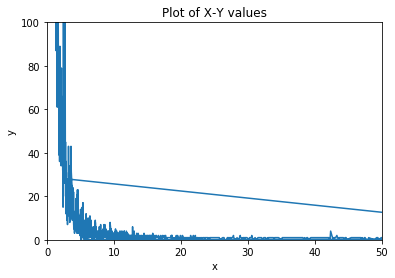

In [14]:
# Plot of x-y values. 

import matplotlib.pyplot as plt
import seaborn as sns

# As we are trying to find point of diminising returns, most of the data
# will be concentrated on lower values of x. 

plt.xlim(0,50) # Restricting x-vlaues for the above reason. 
plt.ylim(0,100) # Restricting y-values as standard deviation is small. 
plt.title('Plot of X-Y values')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(dfe['x'],dfe['y'])

Remarks:  
    
    1) As expected the data shows a decreasing pattern.
    
    2) Due to lot of variation in the data, its necessary to take the noise into account. 

In [15]:
dfe.describe()

,Key,x,y
count,2.350000e+03,2350.000000,2350.000000
mean,3.325879e+15,23.800711,26.231064
std,1.200255e+02,41.805899,142.618264
min,3.325879e+15,0.350000,0.000000
25%,3.325879e+15,6.222500,0.000000
50%,3.325879e+15,12.325000,1.000000
75%,3.325879e+15,23.122500,4.000000
max,3.325879e+15,620.640000,4017.000000


# Finding the point of diminishing returns. 

In [ ]:
Approach: 
    
    To find the point of diminishing returns, we need to find the change in sign of  
second derivative of y.  

In [20]:
# To take the derivative of y with respect to x, we  
# set the differential in x to '0.01' which is constant  
# through out the data set. 

dx = 0.01  

#Using numpy's 'gradient' to find the finite-difference (derivative). 
y_1 = np.gradient(dfe['y'],dx) # first derivative. 
dfe['y_1'] = y_1
y_2 = np.gradient(dfe['y_1'],dx)# second derivative.
dfe['y_2'] = y_2

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


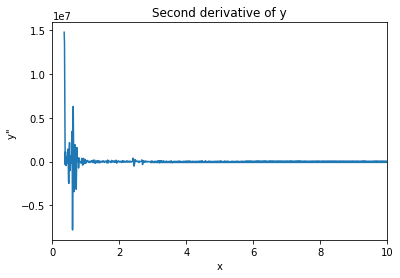

In [34]:
# Plot of second derivative of y. 

plt.title("Second derivative of y")
plt.xlim(0,10) # Adjusted the range of x. 
plt.xlabel('x')
plt.ylabel('y" ')
plt.plot(dfe['x'],dfe['y_2'])

As can be observed, there is a lot of variation in the data.  
So there is a need to smoothen the data.  
For this we use 'Savitzky-Golay' filter.

In [35]:
from scipy.signal import savgol_filter

def savgol(data):
    '''Apply the filter with window size 51 and polynomial degree 1. ''' 
    # We smoothen the data three time whcih in our analysis makes  
    # the data sufficently smooth. 
    # Results of the data are stored in 'ys'
    data['ys1']= savgol_filter(data['y'].values, 51, 1)
    data['ys2']= savgol_filter(data['ys1'].values, 51, 1)
    data['ys3']= savgol_filter(data['ys2'].values, 51, 1)

In [36]:
# Running the data.
savgol(dfe)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

In [37]:
dfe.head()

,Key,x,y,y_1,y_2,ys1,ys2,ys3
18221,3325878942659180,0.35,4017,-276700.0,14780000.0,1337.999246,1294.334746,1273.068743
18222,3325878942659180,0.36,1250,-128900.0,13540000.0,1314.781237,1273.939910,1254.244770
18223,3325878942659180,0.37,1439,-5900.0,5257500.0,1291.563228,1253.545075,1235.420797
18224,3325878942659180,0.38,1132,-23750.0,-337500.0,1268.345219,1233.150239,1216.596824
18225,3325878942659180,0.39,964,-12650.0,1117500.0,1245.127210,1212.755404,1197.772850


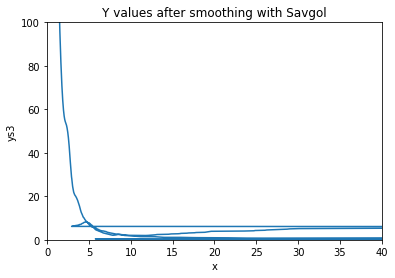

In [38]:
# Plot of data after smoothing. 

plt.title("Y values after smoothing with Savgol")
plt.xlim(0,40)
plt.ylim(0,100)
plt.ylabel("ys3")
plt.xlabel("x")
plt.plot(dfe['x'],dfe['ys3'])

Note:  
As can be noticed, after applying the filter three times, the data  
the data is now sufficently smooth to carry out the analysis. 

In [40]:
# Now finding the point of diminishing returns. 
# For that firstly we compute the derivatives. 


def podr(data):
    
    # Calculate the derivatives first.
    dx = 0.01 # Set the differntial in x. 
    first = np.gradient(data['ys3'],dx)
    data['first'] = first
    second = np.gradient(data['first'],dx)
    data['second'] = second
    
    # Calculate the point of diminishing returns. 
    inf = []
    ps = 0
    std_unb = data['second'].std()/np.sqrt(data.shape[0])  # Calculate unbiased standard deviation.
    cut_off = int(0.5*std_unb)  # Take half of it as cutoff. 
    for i in range(data.shape[0]):
        if ((data['second'].iloc[-i] < 0)== False) and (data['second'].iloc[-i] > cut_off):
            inf.append((data.iloc[-1-i,1],data.iloc[-1-i,2])) # Add (x,y) values. 
    # Return the first point where the "If" condition above is satisfied.
    if len(inf) == 0:
        return -1
    else:
        return inf[0]

In [42]:
# Point of diminishing return for the present data set. 

dim_ret = podr(dfe)

print("(x,y) point of diminishing return: \n", dim_ret)

(x,y) point of diminishing return: 
 (9.1, 1)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


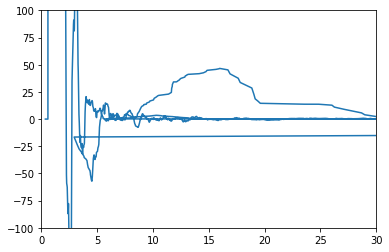

In [81]:
plt.xlim(0,30)
plt.ylim(-100,100)
plt.plot(dfe['x'],dfe['second'])
#plt.scatter(dfe['x'],dfe['second'], color='green')

Remarks:  
    It can be noticed from this graph that this is much smoother in comparision to  
graph of second derivative of unsmoothened data.  


Below, we modify the filtering process to automate calculation of size of window. 

In [43]:
from scipy.signal import savgol_filter

def savgol_f(data):
    '''Apply the filter with window size 51 and polynomial degree 1. ''' 
    # We smoothen the data three time whcih in our analysis makes  
    # the data sufficently smooth. 
    # Results of the data are stored in 'ys'
    window = 0
    if data.shape[0] < 50:
        window = 3
    elif 50<= data.shape[0] < 500:
        window = 11
    else:
        window = 51
    data['ys1']= savgol_filter(data['y'].values, window, 1)
    data['ys2']= savgol_filter(data['ys1'].values, window, 1)
    data['ys3']= savgol_filter(data['ys2'].values, window, 1)

In [44]:
# Program to find the point of moving average for the whole data set. 

# Corresponding to each key, we find the point of diminishing return,  
# whcih is then returned by the function. 

def podr_full():
    points = {}
    for k in keys:
        data = dfs[k]  # Get the dataframe corresponding to the key. 
        savgol_f(data) # Apply the filter to smoothen the data
        pts = podr(data) # Collect the points of diminishing returns. 
        points[k] = pts
    return points

In [45]:
#  Here we collect all the PODRs corresponding to keys in a dictionary. 

points_dim = podr_full()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

Finally, we put the write the dictionary, points_dim into a file. 

In [126]:
# Create a file 'Output.txt' that has points of diminishing returns for each key. 

with open('Output.txt', 'w') as f:
    for key, value in points_dim.items():
        f.write('%s:%s\n' % (key, value))

# Conclusion and results. 

  
    
In above, our startegy to find points of diminishing returns was as follows:  
    
    1) First smoothen the data for each key using a certain filter(Savitzky-Golay).  
    
    2) Then find the x-value at which the sign of second derivative changes.  
    
    3) More precisely, for the second part, the x value should be a point where   
       second derivative is positive and greater than half of unbiased standard deviation. 

## Remarks on the Test data set. 

1) The key corresponding to the data set was 3325878942659180.  

2) The (x,y) value of point of diminishing returns obtained was (9.1,1). 

3) From the graph of un-smoothened data, PODR appeard to be close to 5. 

4) However, this most likely is due to unobserved noise.  

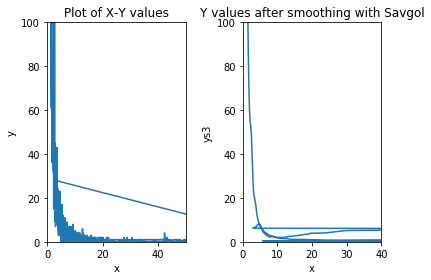

In [53]:
# Comparison of y value plots with and without smoothing. 

plt.subplot(1,2,1)
plt.xlim(0,50) # Restricting x-vlaues for the above reason. 
plt.ylim(0,100) # Restricting y-values as standard deviation is small. 
plt.title('Plot of X-Y values')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(dfe['x'],dfe['y'])

plt.subplot(1,2,2)
plt.title("Y values after smoothing with Savgol")
plt.xlim(0,40)
plt.ylim(0,100)
plt.ylabel("ys3")
plt.xlabel("x")
plt.plot(dfe['x'],dfe['ys3'])

plt.tight_layout()
plt.show()

Note:  
    It can be observed from the graph of smoothened y value, the point of  
    diminishing returns is around 10, which is very close to what we obtained  
    analytically above.  

## Remarks on whole data set. 

In [100]:
# As points_dim is a dictionary, extract the (x,y) values first and then
#  sort x values. 

def podr_x_y(pts):
    x_val = [] # x coordinate of podr
    y_val = [] # y coordinate of podr
    vals = list(pts.values())
    vals.remove(-1)  # Remove an null value from the list to prevent errors. 
    for v in vals:
        x_val.append(v[0])
        y_val.append(v[1])
    return x_val, y_val

In [101]:
x_cord, y_cord = podr_x_y(points_dim)

In [103]:
# Build a data frame to analyze (x,y) values of point of diminishing returns. 

podrs = pd.DataFrame(list(zip(x_cord,y_cord)), columns=['podr_x','podr_y'])

In [105]:
podrs.describe()

,podr_x,podr_y
count,172.000000,172.000000
mean,16.704651,0.697674
std,68.778770,2.757530
min,0.090000,0.000000
25%,1.870000,0.000000
50%,4.285000,0.000000
75%,7.942500,0.000000
max,702.490000,29.000000


Remarks:  
    1) From above, it is clear that majority of x values are less than 8.  
    2) The y-values on the other hand are stay very close to 0. Note that  
       this is affected by our choice of cut-off in second derivative. 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


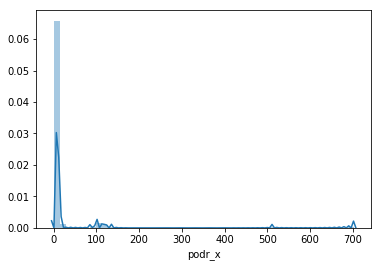

In [134]:
# Studying the X,Y values and their relationships. 

import seaborn as sns
sns.distplot(podrs['podr_x'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


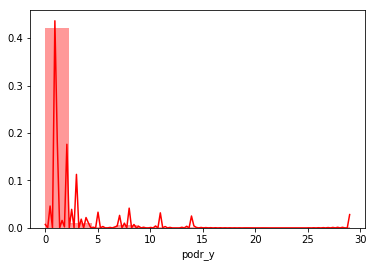

In [125]:
sns.distplot(podrs['podr_y'],color='r')

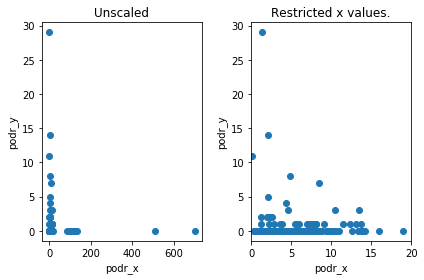

In [133]:
# Pair plot of (x,y). 

# Unscaled version. 
plt.subplot(1,2,1)
plt.title("Unscaled")
plt.xlabel("podr_x")
plt.ylabel("podr_y")
plt.scatter(podrs['podr_x'],podrs['podr_y'])

# As most of the x vlaues are concentrated below 20 we restrict the values. 
plt.subplot(1,2,2)
plt.title("Restricted x values.")
plt.xlim(0,20)
plt.xlabel("podr_x")
plt.ylabel("podr_y")
plt.scatter(podrs['podr_x'],podrs['podr_y'])

plt.tight_layout()
plt.show()

In [138]:
# Statistical properties of podr_x and podr_y. 

from scipy import stats

print("Stats for x values \n", stats.describe(podrs['podr_x']))
print("Stats for y values \n", stats.describe(podrs['podr_y']))

Stats for x values 
 DescribeResult(nobs=172, minmax=(0.09, 702.49), mean=16.7046511627907, variance=4730.519219175847, skewness=8.096314858509496, kurtosis=70.90518404300734)
Stats for y values 
 DescribeResult(nobs=172, minmax=(0, 29), mean=0.6976744186046512, variance=7.603971168230651, skewness=7.5180903159320325, kurtosis=67.11629732584092)


**Remarks**:  
    
    1) From the disribution plots of 'x' and 'y' along with the Kurtosis, skewness data from here,
       it's clear that both x and y have heavy tails.  
        
    2) This indicates presence of many outliers, which due to variance in the data  
        is not so surpsrising. 
        
    3) Possible distributions therefore are Weibull, Logistic, Log-normal etc.

In [169]:
# Closer look at distribution of x values. 

# create a list. 
podrs['Key'] = list(points_dim.keys())

# Now split the data frames based on the range of x values. 

x_1 = podrs[podrs['podr_x'] < 17]   # xvalues less than 17. 
x_2 = podrs[podrs['podr_x'].between(18,200)]
x_3 = podrs[podrs['podr_x'] > 200]

In [171]:
# Dependence of size of data sets on x values. 

# For each of the above data sets of x above, we compute the mean size of data set  
# corresponding to each key. 


def find_avg(data):
    count = 1
    sums = 0
    for k in data['Key']:
        sums += dfs[k].shape[0]
        count += 1
    mean = sums/count
    return mean

In [180]:
print("Number of data sets with podr_x less than 17 is {} and mean size of data sets is {}\n"
      .format(x_1.shape[0],find_avg(x_1)))

Number of data sets with podr_x less than 17 is 161 and mean size of data sets is 900.7654320987655



In [181]:
print("Number of data sets with podr_x in (18,200) is {} and mean size of data sets is {}\n"
      .format(x_2.shape[0],find_avg(x_2)))

Number of data sets with podr_x in (18,200) is 9 and mean size of data sets is 1126.6



In [182]:
print("Number of data sets with podr_x greater than 200 is {} and mean size of data sets is {}\n"
      .format(x_3.shape[0],find_avg(x_3)))

Number of data sets with podr_x greater than 200 is 2 and mean size of data sets is 1495.3333333333333



**Conclusion**:  
    As there are 161 data sets out of 173 with x coordinate of point of diminishing returns  
    less than 17, which is 1 standard deviation from mean, we can *confidently* say that  
    based on our analysis, the x-value of points of diminishing return lies in (0,17). 

** Distribution of point of diminishing returns.**

The data considered here is the x coordinate of points of diminishing returns only for those keys  
that aren't outliers. 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


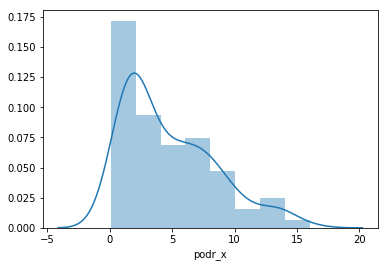

In [186]:
# Distribution plot. 

sns.distplot(x_1['podr_x'])

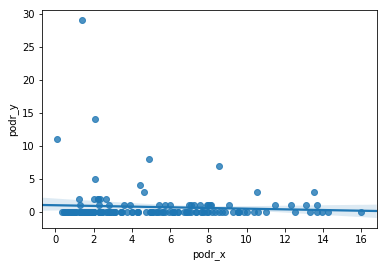

In [221]:
# Improved scatter plot of x and y coordinates of points of diminishing returns. 

sns.regplot(x_1['podr_x'], x_1['podr_y'])

To find out the distribution of x-values of points of diminishing returns,  
we tried fitting several heavy-tailed distributions like Log-normal, Weibull etc.  

Below we use the fitter package to try a large family of distributions. 

In [227]:
%%capture
from fitter import Fitter
f = Fitter(x_1['podr_x'])
f.fit()
Dist = f.summary()

** Candidates for distribution of x coordinates of Points of diminishing returns.** 

In [228]:
# Print the summary and the figure. 
Dist

,sumsquare_error
exponnorm,0.212429
wald,0.215552
gilbrat,0.220310
fatiguelife,0.227331
genexpon,0.228882


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


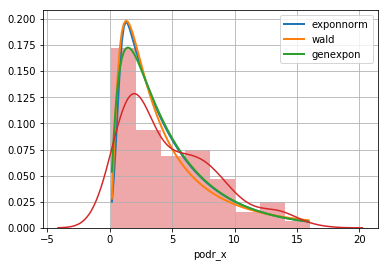

In [235]:
# Plotting the pdf of the distribution above. 

f.plot_pdf(names=['exponnorm','wald','genexpon'])
sns.distplot(x_1['podr_x'])

In [238]:
# Finally, the best fit distribution can be given as:

print("The best distribution fit is: \n", f.get_best())

The best distribution fit is: 
 {'exponnorm': (11.251826911535673, 0.6238283113974579, 0.3688472985407686)}
